In [1]:
import pycaret
import pandas as pd

In [2]:
dataset = pd.read_csv('train_ctrUa4K.csv')

In [3]:
dataset.shape

(614, 13)

In [4]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (583, 13)
Unseen Data For Predictions: (31, 13)


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
2,LP002140,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N
3,LP002522,Female,No,0,Graduate,Yes,2500,0.0,93.0,360.0,NaN,Urban,Y
4,LP002082,Male,Yes,0,Graduate,Yes,5818,2160.0,184.0,360.0,1.0,Semiurban,Y


In [7]:
data['Property_Area'].value_counts()

Semiurban    218
Urban        195
Rural        170
Name: Property_Area, dtype: int64

In [8]:
from pycaret.classification import *

In [9]:
exp_clf101 = setup(data = data, 
                   target = 'Loan_Status', 
                   session_id=123,
                   numeric_imputation='mean',
                   ignore_features=['Loan_ID'],
                   polynomial_features=True,
                   polynomial_degree=3,
                   trigonometry_features=True,
                   feature_interaction=True,
                   feature_selection_threshold=0.5,
                   fix_imbalance=True,
                   fold=10,
                   transformation=True) 

,Description,Value
0,session_id,123
1,Target,Loan_Status
2,Target Type,Binary
3,Label Encoded,"N: 0, Y: 1"
4,Original Data,"(583, 13)"
5,Missing Values,1
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,0
9,High Cardinality Features,0


In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7967,0.7572,0.9237,0.8062,0.8601,0.4911,0.5114,0.0430
rf,Random Forest Classifier,0.7871,0.7784,0.9022,0.8078,0.8513,0.4774,0.4921,0.0760
gbc,Gradient Boosting Classifier,0.7845,0.7778,0.9022,0.8066,0.8502,0.4675,0.4823,0.0890
lightgbm,Light Gradient Boosting Machine,0.7770,0.7754,0.8804,0.8108,0.8425,0.4587,0.4701,0.0410
ridge,Ridge Classifier,0.7526,0.0000,0.8222,0.8160,0.8172,0.4296,0.4347,0.0050
lda,Linear Discriminant Analysis,0.7525,0.7712,0.8185,0.8187,0.8165,0.4312,0.4365,0.0100
lr,Logistic Regression,0.7428,0.7768,0.7974,0.8202,0.8064,0.4196,0.4250,0.3120
ada,Ada Boost Classifier,0.7404,0.7799,0.8196,0.8011,0.8085,0.4037,0.4086,0.0270
dt,Decision Tree Classifier,0.7064,0.6758,0.7615,0.7965,0.7761,0.3469,0.3545,0.0060
knn,K Neighbors Classifier,0.6940,0.7035,0.7471,0.7935,0.7644,0.3211,0.3293,0.0120


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [11]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8537,0.8887,0.9286,0.8667,0.8966,0.6476,0.6521
1,0.7561,0.6923,0.9286,0.7647,0.8387,0.3574,0.3873
2,0.7805,0.6181,0.9643,0.7714,0.8571,0.4077,0.4593
3,0.7561,0.7266,0.8929,0.7812,0.8333,0.3862,0.3984
4,0.7805,0.7033,0.9286,0.7879,0.8525,0.4349,0.4581
5,0.8293,0.7692,0.9643,0.8182,0.8852,0.5605,0.5903
6,0.7561,0.7421,0.8889,0.7742,0.8276,0.4176,0.4294
7,0.8049,0.7791,0.8519,0.8519,0.8519,0.5661,0.5661
8,0.8250,0.8405,0.9630,0.8125,0.8814,0.5570,0.5871
9,0.8250,0.8120,0.9259,0.8333,0.8772,0.5758,0.5855


In [12]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [13]:
tune_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8780,0.8324,0.9643,0.8710,0.9153,0.6999,0.7115
1,0.7317,0.5769,1.0000,0.7179,0.8358,0.1989,0.3323
2,0.8049,0.6923,1.0000,0.7778,0.8750,0.4605,0.5469
3,0.8049,0.7198,0.9643,0.7941,0.8710,0.4859,0.5266
4,0.7561,0.6346,0.9643,0.7500,0.8437,0.3257,0.3868
5,0.8293,0.7308,1.0000,0.8000,0.8889,0.5393,0.6076
6,0.8049,0.7315,0.9630,0.7879,0.8667,0.5162,0.5540
7,0.8293,0.7500,1.0000,0.7941,0.8852,0.5684,0.6301
8,0.8000,0.6923,1.0000,0.7714,0.8710,0.4576,0.5447
9,0.8500,0.7692,1.0000,0.8182,0.9000,0.6117,0.6637


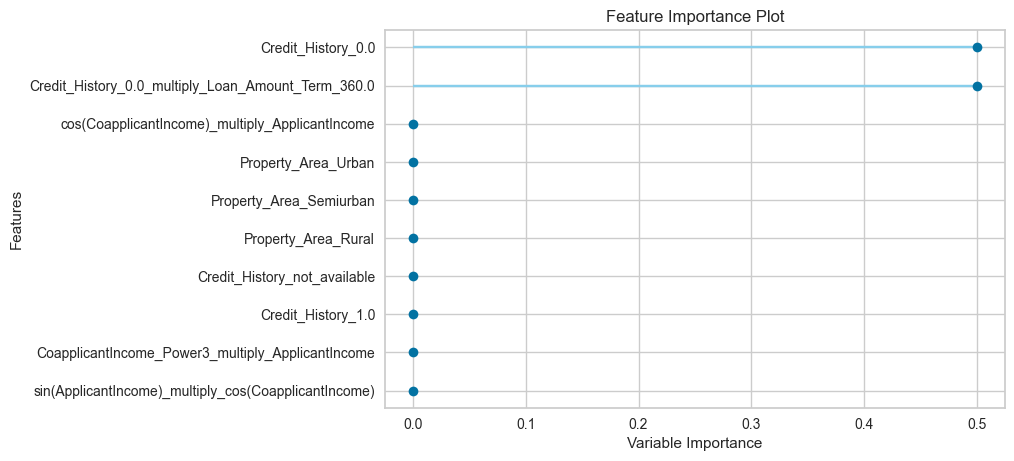

In [14]:
plot_model(tune_et, plot='feature')

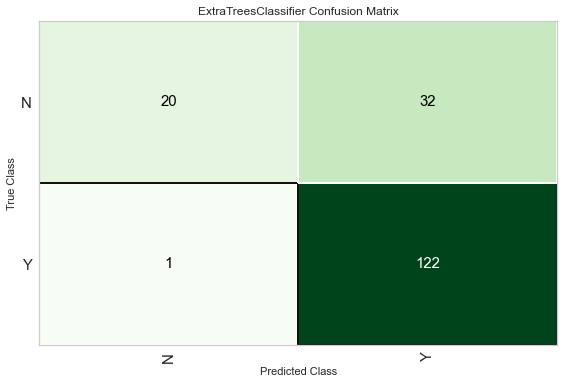

In [15]:
plot_model(tune_et, plot = 'confusion_matrix')

In [16]:
predict_model(tune_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8114,0.6879,0.9919,0.7922,0.8809,0.4547,0.5295


In [17]:
final_et = finalize_model(tune_et)
print(final_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=2, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.1, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


In [18]:
predict_model(final_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8114,0.6879,0.9919,0.7922,0.8809,0.4547,0.5295


In [19]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Label,Score
0,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,Y,0.5243
1,LP001138,Male,Yes,1,Graduate,No,5649,0.0,44.0,360.0,1.0,Urban,Y,Y,0.5243
2,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N,N,0.5951
3,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y,Y,0.5243
4,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y,N,0.5951


In [20]:
save_model(final_et,'Final ET Model 30Mar2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Loan_ID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Loan_Status', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight='balanced', criterion='gini',
                                       max_depth=2, max_features='log2',
                                       max_

In [21]:
saved_final_et = load_model('Final ET Model 30Mar2022')
new_prediction = predict_model(saved_final_et, data=data_unseen)
new_prediction.head(5)

Transformation Pipeline and Model Successfully Loaded


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Label,Score
0,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,Y,0.5243
1,LP001138,Male,Yes,1,Graduate,No,5649,0.0,44.0,360.0,1.0,Urban,Y,Y,0.5243
2,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N,N,0.5951
3,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y,Y,0.5243
4,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y,N,0.5951


In [22]:
test_data = pd.read_csv('test_lAUu6dG.csv')
test_data_prediction = predict_model(saved_final_et, data=test_data)
test_data_prediction

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Label,Score
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y,0.5243
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y,0.5243
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y,0.5243
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y,0.5243
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y,0.5243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y,0.5243
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y,0.5243
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y,0.5243
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y,0.5243


In [23]:
test_data_prediction.rename(columns = {'Label':'Loan_Status'}, 
                            inplace = True)

In [25]:
Out_et_24Mar_2022 = test_data_prediction[['Loan_ID','Loan_Status']]
Out_et_24Mar_2022.to_csv('Out_et_30Mar_2022.csv',index=False)

/Users/deepthi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/deepthi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/deepthi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/deepthi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.

/Users/deepthi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/deepthi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/deepthi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/deepthi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Use